In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.utils import resample, shuffle
import seaborn as sns

# Setting  up seeds for the model and data splitting randomnes for reproducibility and consistency
np.random.seed(42)
random_state=42

In [3]:
# Read data from file
dataTrain = pd.read_csv('train.csv')


dataTrain.head(10)


,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
5,5,111157,Female,Loyal Customer,26,Personal Travel,Eco,1180,3,4,...,1,3,4,4,4,4,1,0,0.0,neutral or dissatisfied
6,6,82113,Male,Loyal Customer,47,Personal Travel,Eco,1276,2,4,...,2,3,3,4,3,5,2,9,23.0,neutral or dissatisfied
7,7,96462,Female,Loyal Customer,52,Business travel,Business,2035,4,3,...,5,5,5,5,4,5,4,4,0.0,satisfied
8,8,79485,Female,Loyal Customer,41,Business travel,Business,853,1,2,...,1,1,2,1,4,1,2,0,0.0,neutral or dissatisfied
9,9,65725,Male,disloyal Customer,20,Business travel,Eco,1061,3,3,...,2,2,3,4,4,3,2,0,0.0,neutral or dissatisfied


In [4]:
# Read data from file

dataTest = pd.read_csv('test.csv')

dataTest.head(10)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied
5,5,39177,Male,Loyal Customer,16,Business travel,Eco,311,3,3,...,5,4,3,1,1,2,5,0,0.0,satisfied
6,6,79433,Female,Loyal Customer,77,Business travel,Business,3987,5,5,...,5,5,5,5,4,5,3,0,0.0,satisfied
7,7,97286,Female,Loyal Customer,43,Business travel,Business,2556,2,2,...,4,4,4,4,5,4,3,77,65.0,satisfied
8,8,27508,Male,Loyal Customer,47,Business travel,Eco,556,5,2,...,5,2,2,5,3,3,5,1,0.0,satisfied
9,9,62482,Female,Loyal Customer,46,Business travel,Business,1744,2,2,...,4,4,4,4,5,4,4,28,14.0,satisfied


In [5]:
import numpy as np
import pandas as pd

def clean_dataset(df, name="Data", columns=None, inplace=False):
    """
    Cleans a DataFrame by:
    - Converting empty strings or spaces to NaN
    - Dropping rows with any NaN (or only in specific columns)

    Args:
        df (pd.DataFrame): Your dataset
        name (str): Name for reporting
        columns (list): If specified, drops rows only if NaN in these columns
        inplace (bool): If True, modifies df in place

    Returns:
        Cleaned DataFrame
    """
    if not inplace:
        df = df.copy()

    # Step 1: Replace blank strings or spaces with real NaN
    df.replace(r'^\s*$', np.nan, regex=True, inplace=True)

    # Step 2: Count before
    before = df.shape[0]

    # Step 3: Drop rows with NaN in general or in specific columns
    if columns:
        df.dropna(subset=columns, inplace=True)
    else:
        df.dropna(inplace=True)

    # Step 4: Count after
    after = df.shape[0]
    removed = before - after

    print(f"{name}: Removed {removed} row(s) with missing or blank fields.")
    return df

dataTrain = clean_dataset(dataTrain, name="dataTrain")
dataTest = clean_dataset(dataTest, name="dataTest")


dataTrain: Removed 310 row(s) with missing or blank fields.
dataTest: Removed 83 row(s) with missing or blank fields.


satisfaction
neutral or dissatisfied    58697
satisfied                  44897
Name: count, dtype: int64


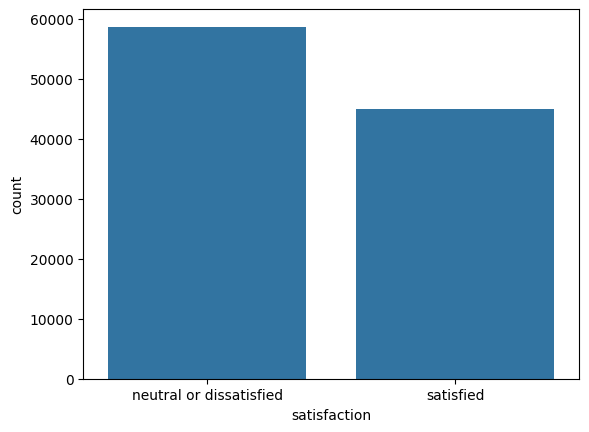

In [6]:

# For training set
sns.countplot(x='satisfaction', data=dataTrain)
print(dataTrain['satisfaction'].value_counts())



satisfaction
neutral or dissatisfied    14528
satisfied                  11365
Name: count, dtype: int64


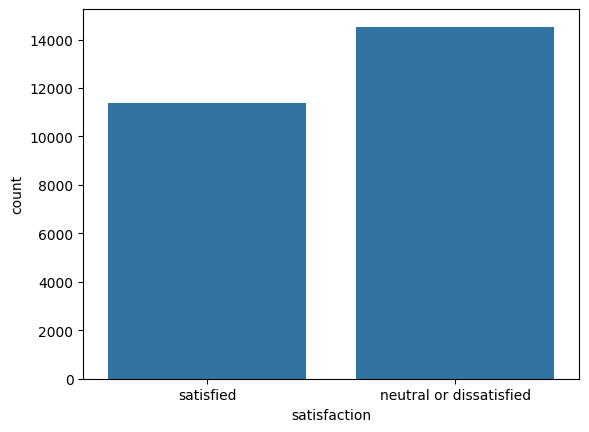

In [7]:
# For test set
sns.countplot(x='satisfaction', data=dataTest)
print(dataTest['satisfaction'].value_counts())


In [8]:
print(dataTrain.columns)

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')


In [9]:

hot_encoded_columns = ['Class']
dataTrain = pd.get_dummies(dataTrain, columns=hot_encoded_columns, drop_first=True, dtype=int)
dataTest = pd.get_dummies(dataTest, columns=hot_encoded_columns, drop_first=True, dtype=int)

# Since the following are simply binary categories, transforming them to 0 and 1 (adjust according to your dataset)
label_encoded_columns = ['Gender','Customer Type','Type of Travel']
label_encoders = {}

for col in label_encoded_columns:
    le = LabelEncoder()
    dataTrain[col] = le.fit_transform(dataTrain[col])
    dataTest[col] = le.transform(dataTest[col])  # Use transform on test data
    label_encoders[col] = le

# 999 indicates client was not previously contacted, change to -1 for less variance
#dataTrain.pdays = dataTrain.pdays.replace(999, -1)
#dataTest.pdays = dataTest.pdays.replace(999, -1)

# Set output "no" to 0 and "yes" to 1 (adjust this for the target column in your dataset)
print(dataTrain['satisfaction'].unique())  # Before mapping

# Fix mapping
dataTrain['satisfaction'] = dataTrain['satisfaction'].map({
    'neutral or dissatisfied': 0,
    'satisfied': 1
})

print(dataTrain['satisfaction'].value_counts())  # After mapping


# Show first 10 rows of the train dataset
dataTrain.head(10)


['neutral or dissatisfied' 'satisfied']
satisfaction
0    58697
1    44897
Name: count, dtype: int64


,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Class_Eco,Class_Eco Plus
0,0,70172,1,0,13,1,460,3,4,3,...,3,4,4,5,5,25,18.0,0,0,1
1,1,5047,1,1,25,0,235,3,2,3,...,5,3,1,4,1,1,6.0,0,0,0
2,2,110028,0,0,26,0,1142,2,2,2,...,3,4,4,4,5,0,0.0,1,0,0
3,3,24026,0,0,25,0,562,2,5,5,...,5,3,1,4,2,11,9.0,0,0,0
4,4,119299,1,0,61,0,214,3,3,3,...,4,4,3,3,3,0,0.0,1,0,0
5,5,111157,0,0,26,1,1180,3,4,2,...,4,4,4,4,1,0,0.0,0,1,0
6,6,82113,1,0,47,1,1276,2,4,2,...,3,4,3,5,2,9,23.0,0,1,0
7,7,96462,0,0,52,0,2035,4,3,4,...,5,5,4,5,4,4,0.0,1,0,0
8,8,79485,0,0,41,0,853,1,2,2,...,2,1,4,1,2,0,0.0,0,0,0
9,9,65725,1,1,20,0,1061,3,3,3,...,3,4,4,3,2,0,0.0,0,1,0


In [10]:
print(dataTrain.columns)

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction', 'Class_Eco', 'Class_Eco Plus'],
      dtype='object')


In [25]:
X = dataTrain.drop(columns=['satisfaction'])
y = dataTrain['satisfaction']

X_test = dataTest.drop(columns=['satisfaction'])
y_test = dataTest['satisfaction']

# Standardization BEFORE SMOTE
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(X_test)

# SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

In [40]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

def train_mlp_model(X, y):
    # Split the resampled data into training and testing sets
    X_train_part, X_test_part, y_train_part, y_test_part = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    # Define the MLP model
    mlp = MLPClassifier(hidden_layer_sizes=(128, 64), max_iter=500, random_state=42)

    # Train the model
    mlp.fit(X_train_part, y_train_part)

    # Predict and evaluate
    y_pred = mlp.predict(X_test_part)
    print("Classification Report:")
    print(classification_report(y_test_part, y_pred))

    return mlp


In [ ]:
mlp_model = train_mlp_model(X_train_res, y_train_res)


📊 Evaluation on Original Test Set:
                         precision    recall  f1-score   support

neutral or dissatisfied       0.85      0.91      0.88     14528
              satisfied       0.87      0.80      0.84     11365

               accuracy                           0.86     25893
              macro avg       0.86      0.86      0.86     25893
           weighted avg       0.86      0.86      0.86     25893



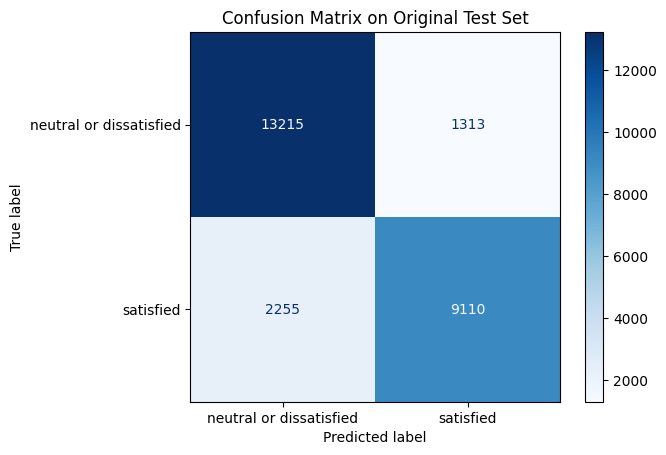

In [35]:
# Predict
y_pred_original = mlp_model.predict(X_test)

# Map integer predictions to string labels
int_to_label = {0: 'neutral or dissatisfied', 1: 'satisfied'}
y_pred_labels = [int_to_label[pred] for pred in y_pred_original]

# Evaluation
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

target_names = ['neutral or dissatisfied', 'satisfied']

print("📊 Evaluation on Original Test Set:")
print(classification_report(y_test, y_pred_labels, target_names=target_names))

cm = confusion_matrix(y_test, y_pred_labels, labels=target_names)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix on Original Test Set")
plt.show()
